# 1️⃣ Motivation from Biological Neuron

A biological neuron works like a tiny decision unit:

- **Inputs** (signals from other neurons) arrive via **dendrites**.
- The neuron **sums** these signals inside the **cell body**.
- If the sum exceeds a **threshold**, the neuron "fires" an output via the **axon**.



Mapping to math
Inputs: $x_1, x_2, \ldots, x_n$

Weights: $w_1, w_2, \ldots, w_n$

Sum: $s = \sum_{i=1}^{n} w_i x_i + b$

Activation: Fire if $s$ exceeds threshold

Key insight: It reduces to a simple linear combination + threshold check.

# 2️⃣ McCulloch-Pitts Neuron and Threshold Logic

Formal neuron model (binary):

$$
f(x) =
\begin{cases}
1 & \text{if } \sum w_i x_i + b \ge 0 \\
0 & \text{otherwise}
\end{cases}
$$


# 3️⃣ Perceptron Model

Generalization for real-valued inputs:

$$
y = \text{sign}(w \cdot x + b)
$$

- $w$: weight vector
- $x$: input vector
- $b$: bias
- Output: $+1$ or $-1$

---

## Geometric intuition

The equation $w \cdot x + b = 0$ defines a **hyperplane** (line in 2D, plane in 3D, etc.) separating space into two halves.




# 4️⃣ Error Function and Error Surface

For a misclassified sample:

$$
E = -y (w \cdot x + b)
$$

- If $y(w \cdot x + b) > 0$ → correctly classified → no error.
- If $y(w \cdot x + b) \leq 0$ → misclassified → error is positive.

---


## Error surface shape

- Piecewise linear
- No smooth gradient information (just "yes/no" corrections)



# 5️⃣ Perceptron Learning Algorithm

**Update rule** for a misclassified point $(x, y)$:

$$
w \leftarrow w + \eta \, y \, x
$$
$$
b \leftarrow b + \eta \, y
$$

- $\eta$: learning rate (usually 1)
- $y$: true label ($+1$ or $-1$)

---

## Step-by-step

1️⃣ Check if point is misclassified.  
2️⃣ If so, "nudge" weights and bias to move the hyperplane toward correctly classifying that point.  
3️⃣ Repeat for all points until no misclassification.

---

## Programming analogy

Update logic resembles classic `if error: correct weights` loop.

---

## Caveat

If data is **not linearly separable**, perceptron never stops updating!


# 6️⃣ Proof of Convergence (Sketch)

If data is linearly separable:

- There exists a perfect hyperplane with margin $\gamma$.
- Each update reduces error and increases "alignment" with true separator.

---

## Key quantities

- $R$: maximum norm of input vectors.
- $\gamma$: margin (minimum distance of any point to the hyperplane).

---

## Bound on updates

$$
\text{Max updates} \leq \left(\frac{R}{\gamma}\right)^2
$$

---

## Intuitive reasoning

Weights keep improving the correct side until no misclassified points remain → algorithm halts in finite time.

---

## Caveat

When data is **not separable**, perceptron cycles indefinitely.


# 7️⃣ Linearly Separable Functions

**Examples:**

- AND and OR → linearly separable.
- XOR → **not** linearly separable.

---

## Visual intuition

- AND: single diagonal line can separate.
- XOR: requires two lines → needs additional layer.

---

## Takeaway

Single-layer perceptron cannot solve XOR or similar problems → leads to multilayer networks (basis of deep learning).


# 8️⃣ Representation Power

- Single perceptron: only linear decision boundaries.
- Network of perceptrons (MLPs): can approximate any continuous function on compact sets (Universal Approximation Theorem).

---

## Programming analogy

Single perceptron = simple if-check.  
MLP = chain of logic checks, forming complex decisions.

---

## Important

Hidden layers introduce **non-linear activations**, allowing "curved" decision boundaries.


Final weights: [3. 2.]
Final bias: -4.0


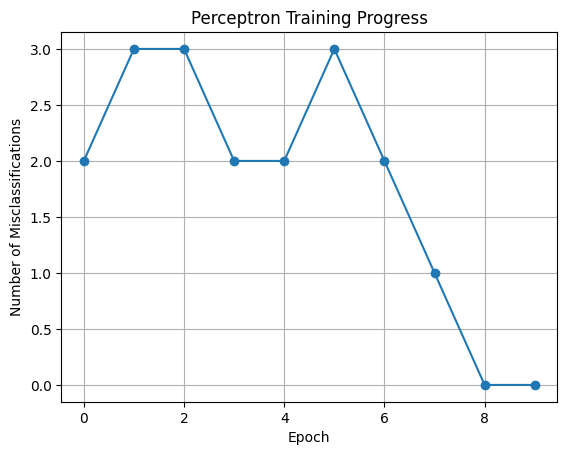

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data for AND gate
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([-1, -1, -1, 1])  # Only (1,1) is +1

# Initialize weights and bias
w = np.zeros(X.shape[1])
b = 0
eta = 1.0
epochs = 10
errors = []

for epoch in range(epochs):
    error_count = 0
    for xi, target in zip(X, y):
        condition = target * (np.dot(xi, w) + b)
        if condition <= 0:
            w += eta * target * xi
            b += eta * target
            error_count += 1
    errors.append(error_count)

print("Final weights:", w)
print("Final bias:", b)

plt.plot(errors, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of Misclassifications')
plt.title('Perceptron Training Progress')
plt.grid(True)
plt.show()
